# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F:\\Real_Combine.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [5]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [6]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [7]:
df1=df.dropna()

In [8]:
df1.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [9]:
df1.reset_index(inplace=True)

In [10]:
x=df.iloc[ :,:-1]

In [11]:
y=df.iloc[:,-1]

In [12]:
x.shape

(1093, 8)

In [13]:
y.shape

(1093,)

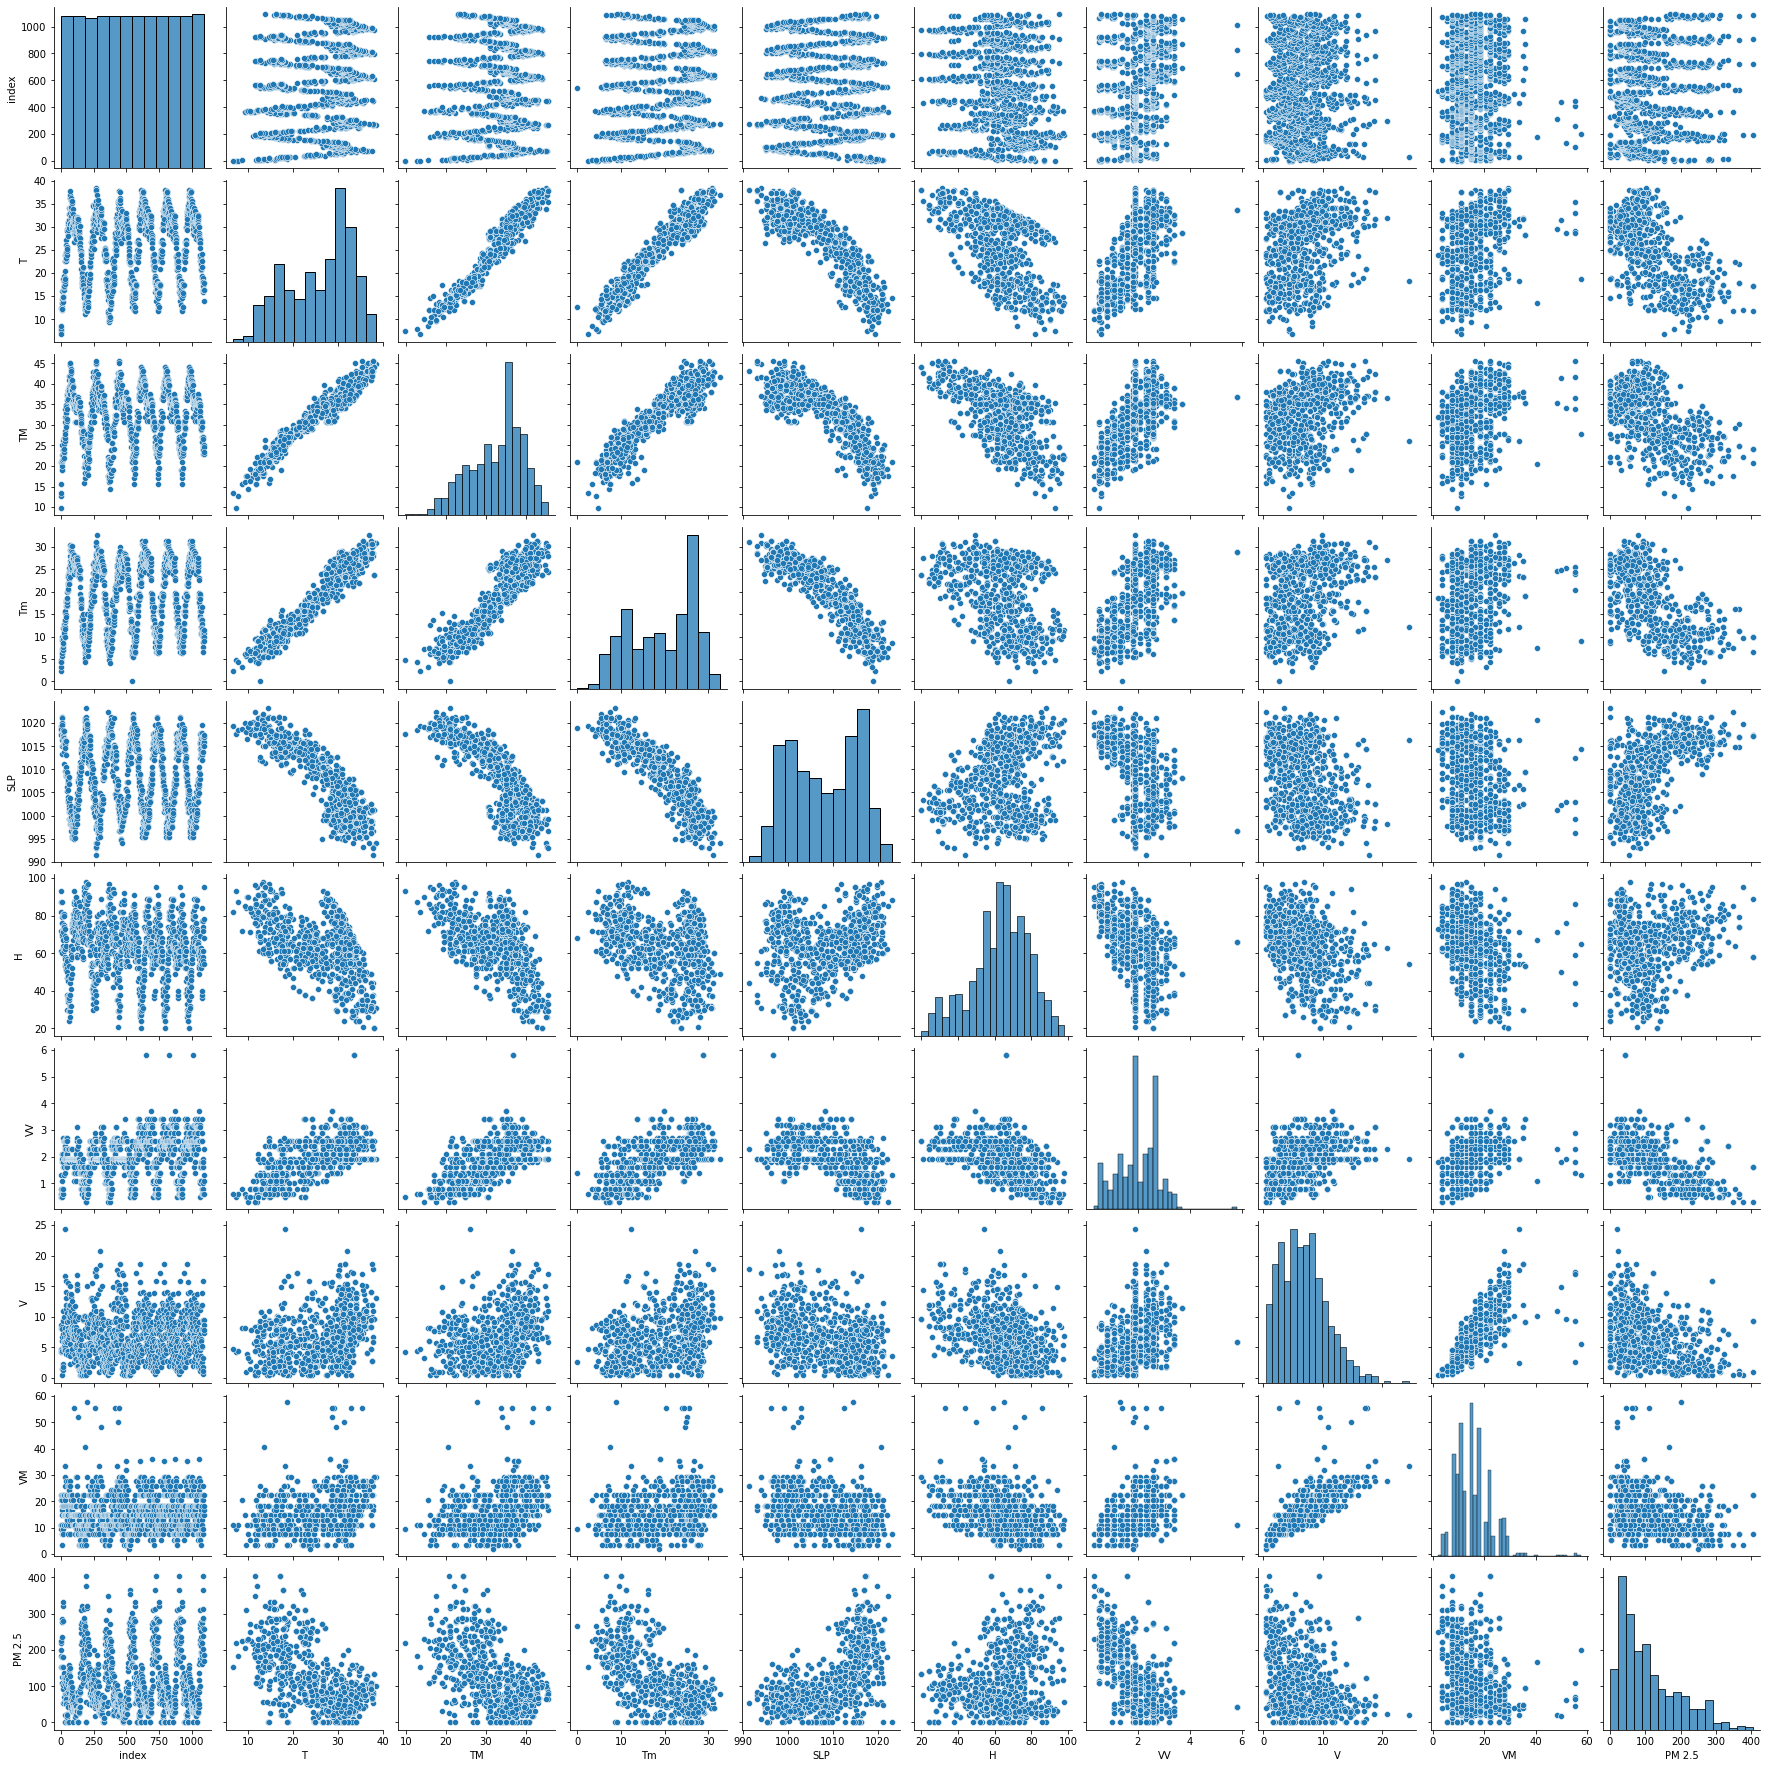

In [14]:
sns.pairplot(df1)

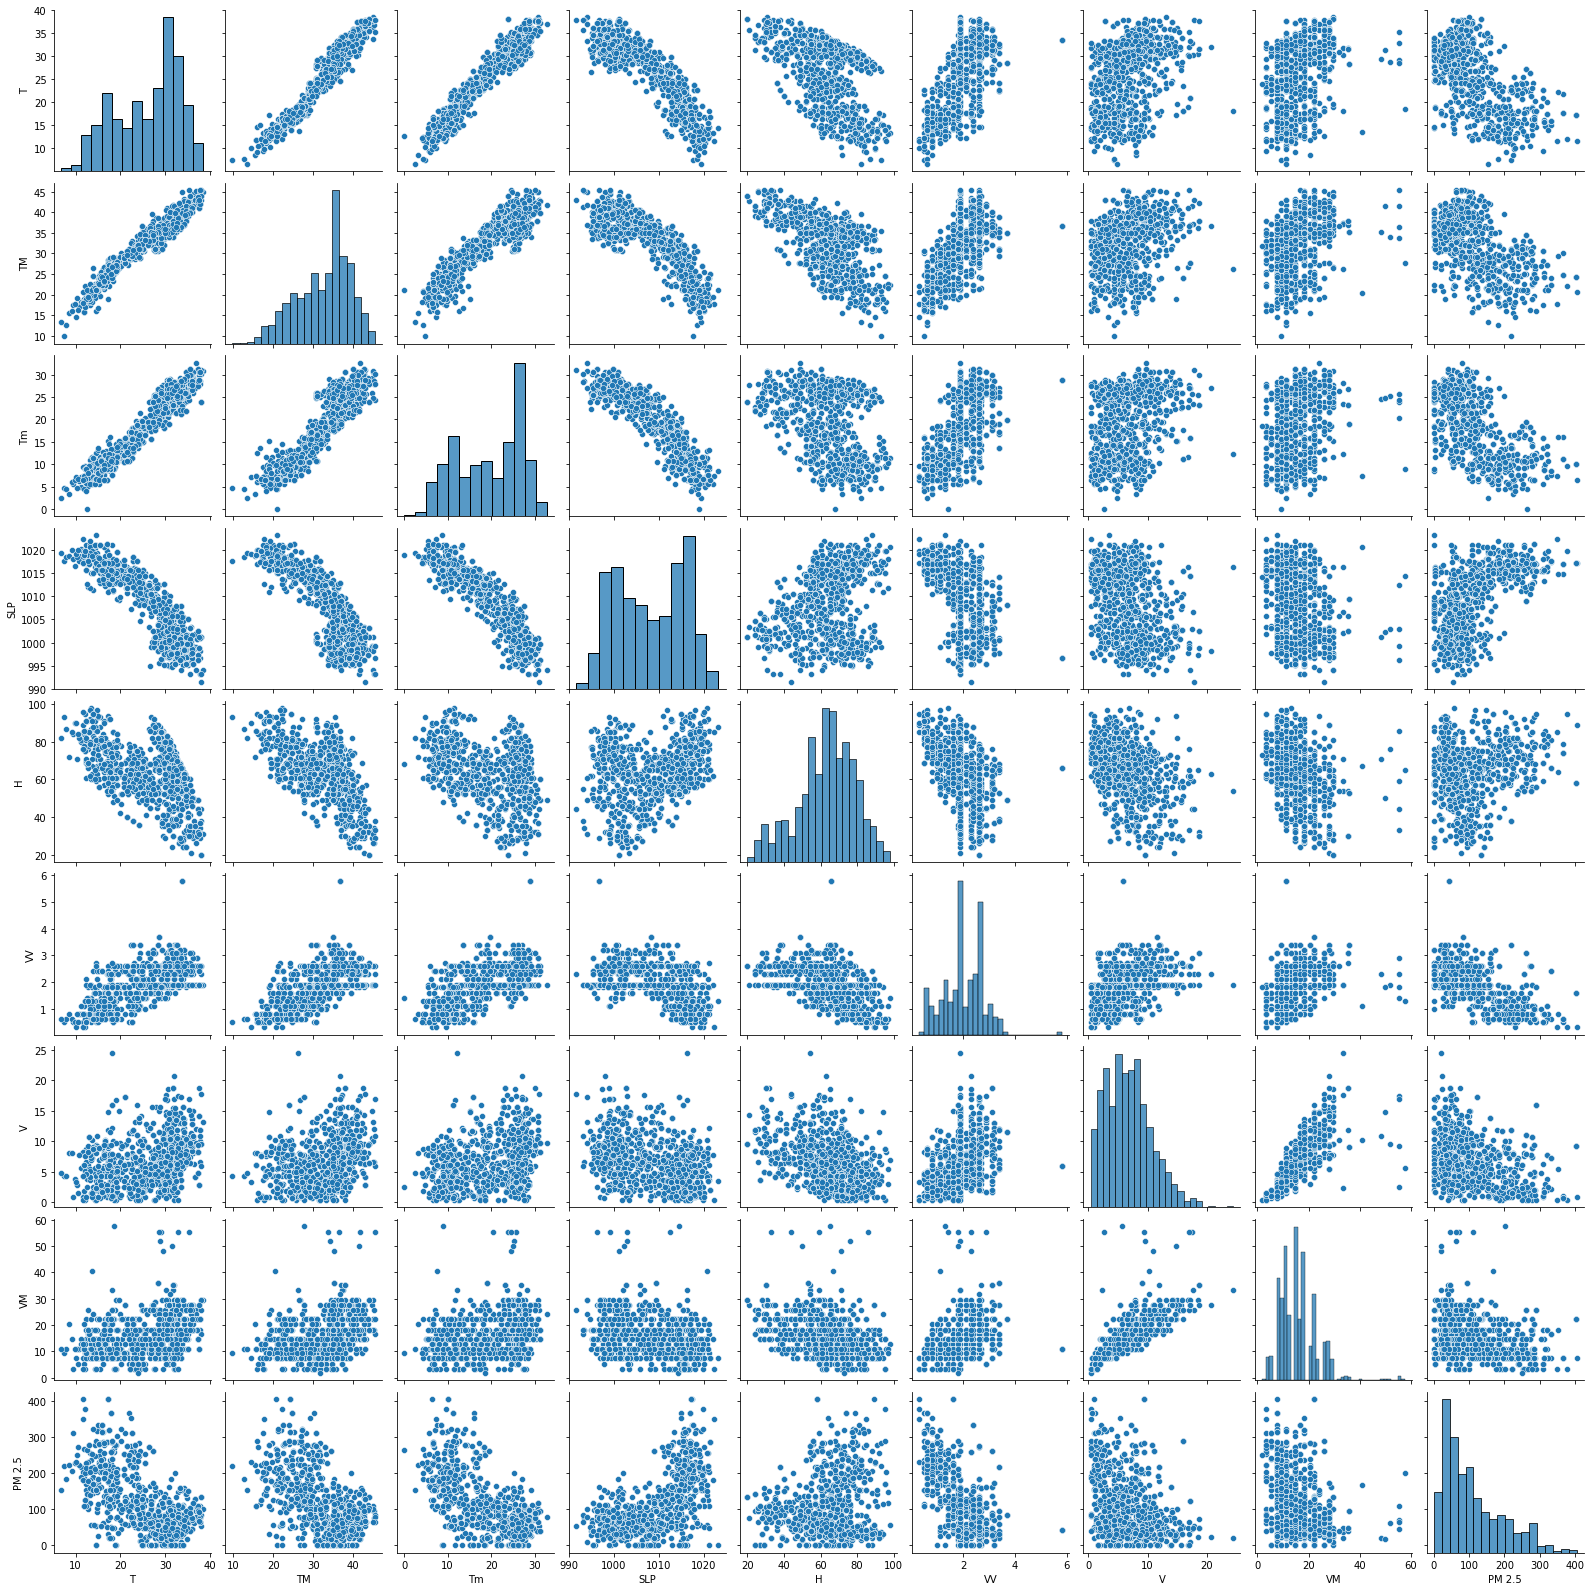

In [15]:
sns.pairplot(df)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
print("shape of x_train is: ",x_train.shape)
print("shape of x_test is: ",x_test.shape)
print("shape of y_train is: ",y_train.shape)
print("shape of y_test is: ",y_test.shape)

shape of x_train is:  (765, 8)
shape of x_test is:  (328, 8)
shape of y_train is:  (765,)
shape of y_test is:  (328,)


# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [21]:
x_train.shape[1]

8

# Building Model

In [22]:
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU,PReLU,ELU
from keras.models import Sequential

Using TensorFlow backend.


In [23]:
from keras.activations import relu

In [24]:
import tensorflow as tf
from tensorflow import keras as keras
from keras.layers import InputLayer

In [25]:
shape=x_train.shape[1]

In [26]:
model=keras.Sequential()
model.add(Dense(128,activation="relu", kernel_initializer='normal',input_dim=x_train.shape[1]))

In [27]:
model.add(Dense(256,activation="relu", kernel_initializer='normal'))
model.add(Dense(256,activation="relu", kernel_initializer='normal'))
model.add(Dense(1,activation="sigmoid", kernel_initializer='normal'))

In [28]:
model.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [29]:
model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Train on 512 samples, validate on 253 samples
Epoch 1/100
512/512 [==============================] - 5s 9ms/sample - loss: -5049.4658 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
512/512 [==============================] - 1s 2ms/sample - loss: -289991.7318 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
512/512 [==============================] - 1s 2ms/sample - loss: -3250762.7449 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
512/512 [==============================] - 1s 1ms/sample - loss: -16709240.5508 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
512/512 [==============================] - 1s 1ms/sample - loss: -54810345.6328 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
512/512 [==============================] - 1s 1ms/sample - loss: -141228930.0781 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100


512/512 [==============================] - 1s 1ms/sample - loss: -906263400704.0000 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 52/100
512/512 [==============================] - 1s 1ms/sample - loss: -967603811072.0000 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 53/100
512/512 [==============================] - 1s 1ms/sample - loss: -1031337300608.0000 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 54/100
512/512 [==============================] - 1s 1ms/sample - loss: -1099295083584.0000 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 55/100
512/512 [==============================] - 1s 1ms/sample - loss: -1168018714368.0000 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 56/100
512/512 [==============================] - 1s 1ms/sample - loss: -1239949849088.0000 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 57/100
512/512 [=========

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
y_pred=model.predict(x_test)

In [32]:
mse=mean_squared_error(y_pred,y_test)

In [33]:
print(mse)

18298.239224784043


In [34]:
rmse=np.sqrt(mse)

In [35]:
rmse

135.27098441566855

In [36]:
mae=mean_absolute_error(y_pred,y_test)

In [37]:
mae

105.20779979674796